In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("kozhikado-1.csv")


In [3]:
df

,Unnamed: 0,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M.1
0,0,26.33,0.0,5,1,6,2011,93.31,5.64,5.64
1,1,26.56,0.0,6,1,6,2011,92.81,6.04,6.04
2,2,26.87,0.0,7,1,6,2011,91.88,6.96,6.96
3,3,27.13,0.0,8,1,6,2011,90.69,8.18,8.18
4,4,27.30,0.0,9,1,6,2011,87.56,9.20,9.20
...,...,...,...,...,...,...,...,...,...,...
86203,86203,27.12,0.0,0,1,4,2021,88.69,4.61,4.61
86204,86204,27.01,0.0,1,1,4,2021,88.69,4.84,4.84
86205,86205,26.94,0.0,2,1,4,2021,88.44,5.03,5.03
86206,86206,26.81,0.0,3,1,4,2021,88.44,5.07,5.07


In [4]:
d=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df=d.copy()

In [6]:
X = df.drop(["PRECTOTCORR", "HR","DY","MO","YEAR","RH2M","WS50M"], axis=1)
Y = df["PRECTOTCORR"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [8]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.05855105, 0.03043855])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


T2M        0.058551
WS50M.1    0.030439
dtype: float64

<AxesSubplot:>

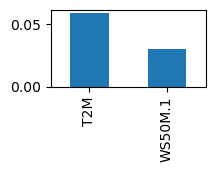

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(2, 1))


In [11]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))


The number of classes before fit Counter({0.0: 48327, 1.0: 20639})
The number of classes after fit Counter({0.0: 48327, 1.0: 48327})


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)


LogisticRegression()

In [13]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[7435 4647]
 [2110 3050]]
0.6081081081081081
              precision    recall  f1-score   support

         0.0       0.78      0.62      0.69     12082
         1.0       0.40      0.59      0.47      5160

    accuracy                           0.61     17242
   macro avg       0.59      0.60      0.58     17242
weighted avg       0.66      0.61      0.62     17242



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6032317599760808

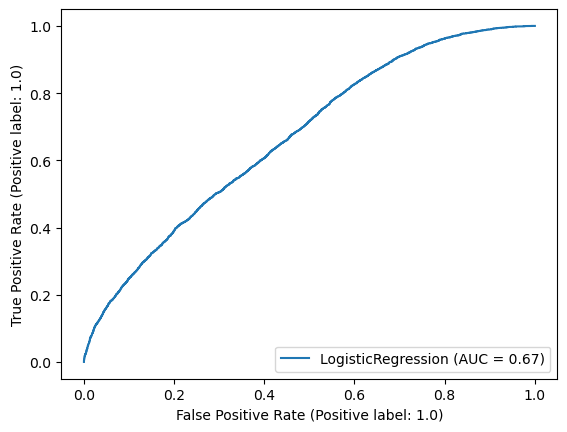

In [14]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)


In [15]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)


GaussianNB()

In [16]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[8244 3838]
 [1907 3253]]
0.6668019951281754
              precision    recall  f1-score   support

         0.0       0.81      0.68      0.74     12082
         1.0       0.46      0.63      0.53      5160

    accuracy                           0.67     17242
   macro avg       0.64      0.66      0.64     17242
weighted avg       0.71      0.67      0.68     17242



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6563818589765799

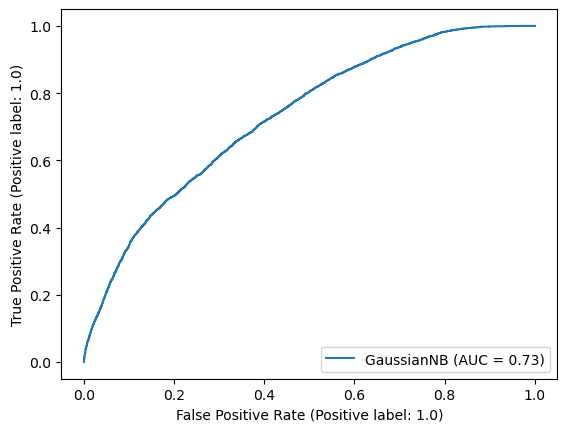

In [17]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)


In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[8095 3987]
 [2316 2844]]
0.6344391601902332
              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72     12082
         1.0       0.42      0.55      0.47      5160

    accuracy                           0.63     17242
   macro avg       0.60      0.61      0.60     17242
weighted avg       0.67      0.63      0.65     17242



In [20]:
from sklearn.metrics import RocCurveDisplay

/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6105838783814477

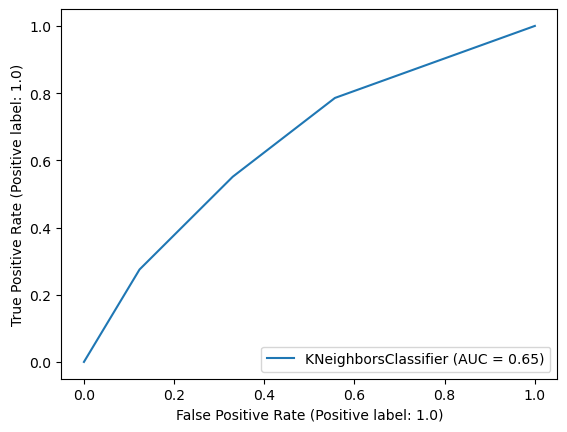

In [21]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)


In [22]:
svc = SVC()


In [23]:
svc.fit(X_train_res, y_train_res)


SVC()

In [24]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[8081 4001]
 [1734 3426]]
0.6673819742489271
              precision    recall  f1-score   support

         0.0       0.82      0.67      0.74     12082
         1.0       0.46      0.66      0.54      5160

    accuracy                           0.67     17242
   macro avg       0.64      0.67      0.64     17242
weighted avg       0.71      0.67      0.68     17242



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6663998529428748

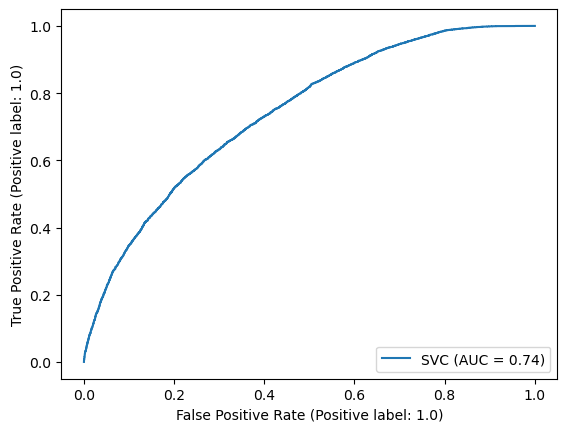

In [25]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None)


In [26]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred6 = bst.predict(X_test)

In [27]:
# y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[11149   933]
 [ 3508  1652]]
0.7424312724741909
              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83     12082
         1.0       0.64      0.32      0.43      5160

    accuracy                           0.74     17242
   macro avg       0.70      0.62      0.63     17242
weighted avg       0.72      0.74      0.71     17242



In [28]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [29]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[9159 2923]
 [2704 2456]]
0.6736457487530448
              precision    recall  f1-score   support

         0.0       0.77      0.76      0.77     12082
         1.0       0.46      0.48      0.47      5160

    accuracy                           0.67     17242
   macro avg       0.61      0.62      0.62     17242
weighted avg       0.68      0.67      0.68     17242



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6170194241160853

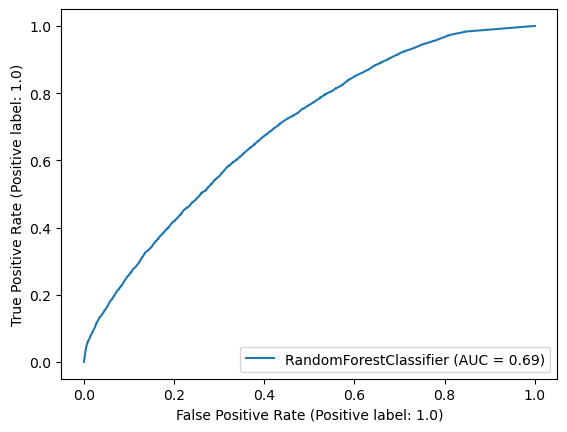

In [30]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)


In [31]:
cat = CatBoostClassifier(iterations=2000, eval_metric="AUC")
cat.fit(X_train_res, y_train_res)


Learning rate set to 0.038422
0:	total: 101ms	remaining: 3m 22s
1:	total: 164ms	remaining: 2m 43s
2:	total: 213ms	remaining: 2m 21s
3:	total: 287ms	remaining: 2m 23s
4:	total: 345ms	remaining: 2m 17s
5:	total: 410ms	remaining: 2m 16s
6:	total: 485ms	remaining: 2m 18s
7:	total: 506ms	remaining: 2m 5s
8:	total: 549ms	remaining: 2m 1s
9:	total: 624ms	remaining: 2m 4s
10:	total: 707ms	remaining: 2m 7s
11:	total: 755ms	remaining: 2m 5s
12:	total: 805ms	remaining: 2m 2s
13:	total: 866ms	remaining: 2m 2s
14:	total: 907ms	remaining: 2m
15:	total: 978ms	remaining: 2m 1s
16:	total: 1.09s	remaining: 2m 6s
17:	total: 1.15s	remaining: 2m 6s
18:	total: 1.25s	remaining: 2m 10s
19:	total: 1.32s	remaining: 2m 11s
20:	total: 1.42s	remaining: 2m 13s
21:	total: 1.46s	remaining: 2m 11s
22:	total: 1.49s	remaining: 2m 8s
23:	total: 1.52s	remaining: 2m 5s
24:	total: 1.6s	remaining: 2m 6s
25:	total: 1.72s	remaining: 2m 10s
26:	total: 1.75s	remaining: 2m 7s
27:	total: 1.76s	remaining: 2m 4s
28:	total: 1.78s	rem

In [32]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8190 3892]
 [1715 3445]]
0.6748057069945482
              precision    recall  f1-score   support

         0.0       0.83      0.68      0.74     12082
         1.0       0.47      0.67      0.55      5160

    accuracy                           0.67     17242
   macro avg       0.65      0.67      0.65     17242
weighted avg       0.72      0.67      0.69     17242



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6727517807899251

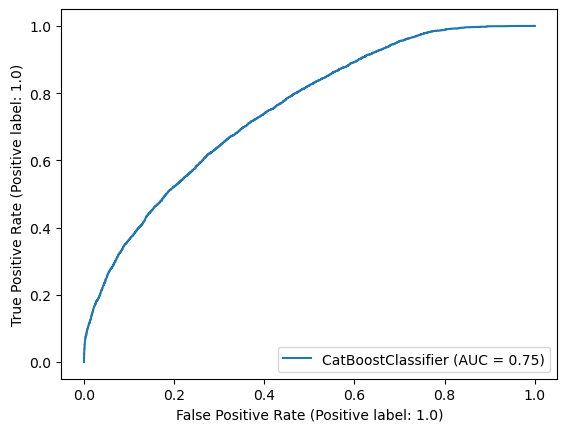

In [33]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [34]:
joblib.dump(rf, "rf.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(bst, "xgb.pkl")
joblib.dump(svc, "cat.pkl")

['cat.pkl']